In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras.applications.efficientnet
from keras.applications.efficientnet import EfficientNetB7
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2L
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
tf.__version__

'2.9.3'

In [4]:
data_base_train_folder = 'd:/Dane/diabetic-retinopathy-detection/unpacked/POC/Train'
data_base_valid_folder = 'd:/Dane/diabetic-retinopathy-detection/unpacked/POC/Valid'

In [5]:
training_workspace_folder = "d:/Fundus/vgg_retino/training_workspace/"

In [6]:
def create_model_from_vgg16():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [7]:
def create_model_from_inceptionV3():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [8]:
def create_model_from_inceptionV3_B():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        #BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [9]:
def create_model_from_inceptionV3_D():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dense(16),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [10]:
def create_model_from_inceptionV3_C():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [11]:
def create_model_from_efficientnet_B():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model    

In [12]:
def create_model_from_efficientnet_C():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model  

In [13]:
def create_model_from_InceptionResNetV2_A():
    base_model = InceptionResNetV2(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [14]:
def create_model_from_VGG19_A():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [15]:
def create_model_from_VGG19_B():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [16]:
def create_model_from_VGG19_C():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(16, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [17]:
def create_model_from_EfficientNetV2L_A():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(16, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [18]:
def create_model_from_EfficientNetV2L_B():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="relu"),
        Dropout(0.2),
        Dense(512, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [19]:
def create_model_from_EfficientNetV2L_C():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(2048, activation="sigmoid"),
        Dropout(0.2),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [20]:
def create_model_from_vgg16_B():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [21]:
def create_model_from_vgg16_C():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [22]:
def create_model_from_efficientnet_D():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [23]:
def create_model_from_efficientnet_E():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [24]:
def create_model_from_vgg16_D():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [25]:
def create_model_from_vgg16_E():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    vgg16.layers[-1].trainable = True
    vgg16.layers[-2].trainable = True
    vgg16.layers[-3].trainable = True
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [26]:
def create_model_from_vgg16_E():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    vgg16.layers[-1].trainable = True
    vgg16.layers[-2].trainable = True
    vgg16.layers[-3].trainable = True
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [27]:
def create_model_from_vgg16_F():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in vgg16.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        vgg16,
        Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        #Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Flatten(),    
        BatchNormalization(),
        #Dense(1024, activation="sigmoid"),
        #Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return new_model

In [28]:
def create_model_from_vgg16_G():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in vgg16.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(4096, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return (new_model, keras.applications.vgg16.preprocess_input)

In [29]:
def create_model_from_ResNet152V2_A():
    base_model = ResNet152V2(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in base_model.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return (new_model, keras.applications.resnet_v2.preprocess_input)

In [30]:
def create_model_from_efficientnet_C():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.efficientnet_v2.preprocess_input)

In [31]:
def create_model_from_DenseNet121_C():
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        GlobalAveragePooling2D(),  
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.densenet.preprocess_input)

In [32]:
def create_model_from_DenseNet121_D():
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(4096, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.densenet.preprocess_input)

In [33]:
def create_model_from_ResNet50_A():
    base_model = ResNet50(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.resnet.preprocess_input)

In [34]:
checkpointer = ModelCheckpoint(filepath = training_workspace_folder +'best_val_loss_weights.h5', verbose = 1, monitor = 'val_loss', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer2 = ModelCheckpoint(filepath = training_workspace_folder +'best_accuracy_weights.h5', verbose = 1, monitor = 'accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer3 = ModelCheckpoint(filepath = training_workspace_folder +'best_val_accuracy_weights.h5', verbose = 1, monitor = 'val_accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased

In [35]:
(model, selected_preprocessing_function) = create_model_from_ResNet50_A()

In [36]:
selected_preprocessing_function

<function keras.applications.resnet.preprocess_input(x, data_format=None)>

In [37]:
train_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_train_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = ['dr', 'nodr'],
    batch_size = 32)

Found 17696 images belonging to 2 classes.


In [38]:
validation_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_valid_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = ['dr', 'nodr'],
    batch_size = 32)

Found 10327 images belonging to 2 classes.


In [39]:
def scheduler_I(epoch, lr):
    if epoch < 10:
        return 0.001
    
    if epoch < 20:
        return 0.0005
    
    if epoch < 50:
        return 0.0001
    
    return 0.00005

In [40]:
def scheduler_II(epoch, lr):
    if epoch < 10:
        return 0.001
    
    if epoch < 20:
        return 0.0001
    
    if epoch < 50:
        return 0.00001
    
    return 0.000005

In [41]:
learning_rate_scheduler_callback = LearningRateScheduler(scheduler_I)

In [42]:
csv_logger = CSVLogger('d:/Fundus/vgg_retino/training_workspace/training.log')

In [43]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
json_string = model.to_json()
open(training_workspace_folder + 'TL_model_architecture.json', 'w').write(json_string)
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    callbacks = [checkpointer, checkpointer2, checkpointer3, learning_rate_scheduler_callback, csv_logger]
)

C:\Users\ax\AppData\Local\Temp\ipykernel_13232\1785077291.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
553/553 [==============================] - ETA: 0s - loss: 0.5785 - accuracy: 0.7382
Epoch 1: val_loss improved from inf to 0.55966, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_loss_weights.h5

Epoch 1: accuracy improved from -inf to 0.73819, saving model to d:/Fundus/vgg_retino/training_workspace\best_accuracy_weights.h5

Epoch 1: val_accuracy improved from -inf to 0.73429, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_accuracy_weights.h5
553/553 [==============================] - 395s 703ms/step - loss: 0.5785 - accuracy: 0.7382 - val_loss: 0.5597 - val_accuracy: 0.7343 - lr: 0.0010
Epoch 2/100
553/553 [==============================] - ETA: 0s - loss: 0.5411 - accuracy: 0.7532
Epoch 2: val_loss improved from 0.55966 to 0.55879, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_loss_weights.h5

Epoch 2: accuracy improved from 0.73819 to 0.75316, saving model to d:/Fundus/vgg_retino/training_workspace\best_accuracy_wei


Epoch 16: accuracy improved from 0.76735 to 0.77040, saving model to d:/Fundus/vgg_retino/training_workspace\best_accuracy_weights.h5

Epoch 16: val_accuracy improved from 0.74785 to 0.75036, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_accuracy_weights.h5
553/553 [==============================] - 304s 549ms/step - loss: 0.5149 - accuracy: 0.7704 - val_loss: 0.5382 - val_accuracy: 0.7504 - lr: 5.0000e-04
Epoch 17/100
553/553 [==============================] - ETA: 0s - loss: 0.5153 - accuracy: 0.7675
Epoch 17: val_loss improved from 0.53815 to 0.53594, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_loss_weights.h5

Epoch 17: accuracy did not improve from 0.77040

Epoch 17: val_accuracy did not improve from 0.75036
553/553 [==============================] - 285s 516ms/step - loss: 0.5153 - accuracy: 0.7675 - val_loss: 0.5359 - val_accuracy: 0.7477 - lr: 5.0000e-04
Epoch 18/100
553/553 [==============================] - ETA: 0s - loss: 0.5144 - acc


Epoch 34: accuracy did not improve from 0.77430

Epoch 34: val_accuracy improved from 0.75298 to 0.75559, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_accuracy_weights.h5
553/553 [==============================] - 296s 536ms/step - loss: 0.5075 - accuracy: 0.7716 - val_loss: 0.5335 - val_accuracy: 0.7556 - lr: 1.0000e-04
Epoch 35/100
553/553 [==============================] - ETA: 0s - loss: 0.5083 - accuracy: 0.7730
Epoch 35: val_loss did not improve from 0.53348

Epoch 35: accuracy did not improve from 0.77430

Epoch 35: val_accuracy did not improve from 0.75559
553/553 [==============================] - 285s 515ms/step - loss: 0.5083 - accuracy: 0.7730 - val_loss: 0.5379 - val_accuracy: 0.7515 - lr: 1.0000e-04
Epoch 36/100
553/553 [==============================] - ETA: 0s - loss: 0.5055 - accuracy: 0.7749
Epoch 36: val_loss did not improve from 0.53348

Epoch 36: accuracy improved from 0.77430 to 0.77486, saving model to d:/Fundus/vgg_retino/training_workspace\

553/553 [==============================] - 288s 521ms/step - loss: 0.5016 - accuracy: 0.7750 - val_loss: 0.5340 - val_accuracy: 0.7509 - lr: 5.0000e-05
Epoch 54/100
553/553 [==============================] - ETA: 0s - loss: 0.5024 - accuracy: 0.7763
Epoch 54: val_loss did not improve from 0.52864

Epoch 54: accuracy did not improve from 0.77633

Epoch 54: val_accuracy improved from 0.75559 to 0.75569, saving model to d:/Fundus/vgg_retino/training_workspace\best_val_accuracy_weights.h5
553/553 [==============================] - 298s 539ms/step - loss: 0.5024 - accuracy: 0.7763 - val_loss: 0.5316 - val_accuracy: 0.7557 - lr: 5.0000e-05
Epoch 55/100
553/553 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.7741
Epoch 55: val_loss did not improve from 0.52864

Epoch 55: accuracy did not improve from 0.77633

Epoch 55: val_accuracy did not improve from 0.75569
553/553 [==============================] - 291s 526ms/step - loss: 0.5071 - accuracy: 0.7741 - val_loss: 0.531

Epoch 73/100
553/553 [==============================] - ETA: 0s - loss: 0.5056 - accuracy: 0.7738
Epoch 73: val_loss did not improve from 0.52736

Epoch 73: accuracy did not improve from 0.77639

Epoch 73: val_accuracy did not improve from 0.75811
553/553 [==============================] - 289s 523ms/step - loss: 0.5056 - accuracy: 0.7738 - val_loss: 0.5315 - val_accuracy: 0.7530 - lr: 5.0000e-05
Epoch 74/100
553/553 [==============================] - ETA: 0s - loss: 0.5030 - accuracy: 0.7753
Epoch 74: val_loss did not improve from 0.52736

Epoch 74: accuracy did not improve from 0.77639

Epoch 74: val_accuracy did not improve from 0.75811
553/553 [==============================] - 289s 523ms/step - loss: 0.5030 - accuracy: 0.7753 - val_loss: 0.5335 - val_accuracy: 0.7539 - lr: 5.0000e-05
Epoch 75/100
553/553 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7736
Epoch 75: val_loss did not improve from 0.52736

Epoch 75: accuracy did not improve from 0.77639

Epoc

Epoch 93/100
553/553 [==============================] - ETA: 0s - loss: 0.5029 - accuracy: 0.7753
Epoch 93: val_loss did not improve from 0.52686

Epoch 93: accuracy did not improve from 0.77893

Epoch 93: val_accuracy did not improve from 0.75811
553/553 [==============================] - 291s 526ms/step - loss: 0.5029 - accuracy: 0.7753 - val_loss: 0.5328 - val_accuracy: 0.7538 - lr: 5.0000e-05
Epoch 94/100
553/553 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7755
Epoch 94: val_loss did not improve from 0.52686

Epoch 94: accuracy did not improve from 0.77893

Epoch 94: val_accuracy did not improve from 0.75811
553/553 [==============================] - 291s 525ms/step - loss: 0.5020 - accuracy: 0.7755 - val_loss: 0.5314 - val_accuracy: 0.7530 - lr: 5.0000e-05
Epoch 95/100
553/553 [==============================] - ETA: 0s - loss: 0.5039 - accuracy: 0.7758
Epoch 95: val_loss did not improve from 0.52686

Epoch 95: accuracy did not improve from 0.77893

Epoc

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                        

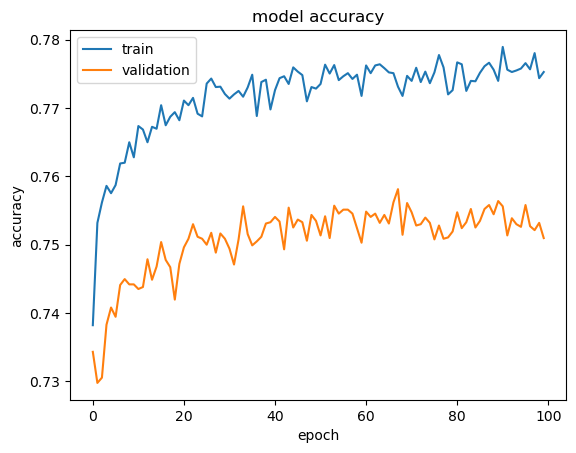

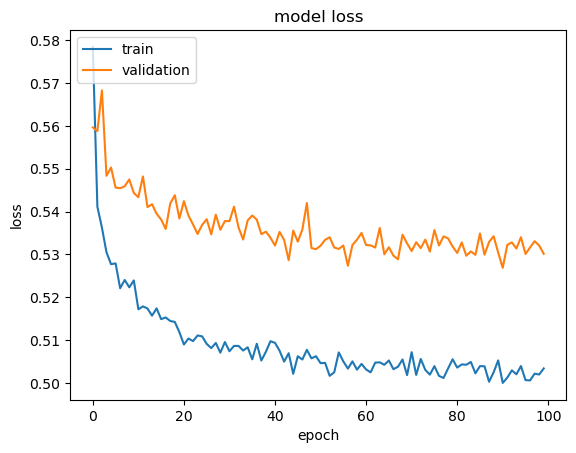

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()